# Exploration of Popular Data Science Questions on Stack Exchange

In this case, our goal is to explore what data questions are popluar in Stack Exchange. Firstly,we will clean raw data then we will basd on the cleaning data to identify what kind of questions are asked and viewed the most. 

In [91]:
# We import everything that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
questions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


we can see there are many missing values in FavoriteCount. We can replace the missing value with 0 later. 

In [4]:
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [5]:
#Since the object dtype is a catch-all type, let's see what types the objects in questions["Tags"] are.
def vee(value):
    return type(value)
questions['Tags'].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

There are various tags in the tags column, we can breakdown them into various columns. However, it does not help me to do further analysis in this case. We can skip this step. 

# Cleaning the Data

In [6]:
#clean the favoriteCount
questions['FavoriteCount'].fillna(0,inplace=True)
questions['FavoriteCount']=questions['FavoriteCount'].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

In [7]:
#Motify Tags columns
questions["Tags"] = questions["Tags"].str.replace("^<|>$", "").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
1334,46183,2019-02-25 09:20:05,3,113,"[python, pandas]",2,0
3233,60489,2019-09-20 09:45:43,0,57,"[classification, keras, nlp, lstm, sentiment-a...",2,0
3501,60591,2019-09-22 16:22:24,0,15,"[gradient-descent, cost-function, theano]",0,0


# Tag Analysis
Most Used and Most Viewed

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

In [8]:
tag_count={}
for row in questions['Tags']:
    for tag in row:
        if tag in tag_count:
            tag_count[tag]+=1
        else:
            tag_count[tag]=1

In [9]:
#change a dictionary into a dataframe
tag_count=pd.DataFrame.from_dict(tag_count,orient='index')

In [10]:
tag_count.rename(columns={0:'count'},inplace=True)
tag_count

,count
data-leakage,8
pruning,3
open-set,2
time-series,466
counts,3
azure-ml,12
siamese,1
bayesian-networks,12
image,32
multivariate-distribution,1


In [11]:
#select top 20 most_used tags
most_used=tag_count.sort_values(by='count',ascending=True).tail(10)
most_used

,count
cnn,489
nlp,493
scikit-learn,540
tensorflow,584
classification,685
keras,935
neural-network,1055
deep-learning,1220
python,1814
machine-learning,2693


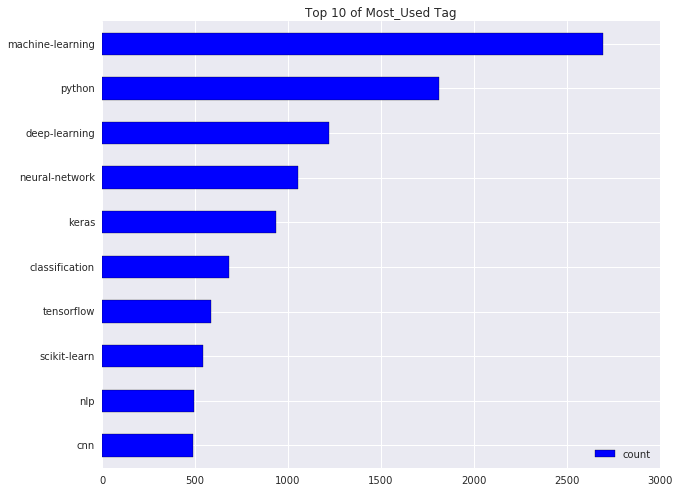

In [12]:
most_used.plot(kind='barh',title='Top 10 of Most_Used Tag',figsize=(10,8),color='blue')


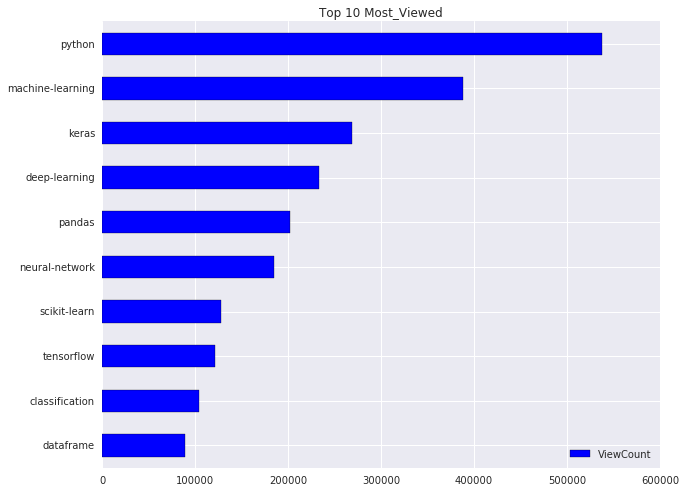

In [13]:
#count view times
tag_view_count={}
for index,row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] +=row['ViewCount']
        else:
            tag_view_count[tag] =row['ViewCount']
tag_view_count=pd.DataFrame.from_dict(tag_view_count,orient='index')
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)
most_viewed = tag_view_count.sort_values(by="ViewCount",ascending=True).tail(10)
most_viewed.plot(kind="barh",title='Top 10 Most_Viewed',color='blue', figsize=(10,8))

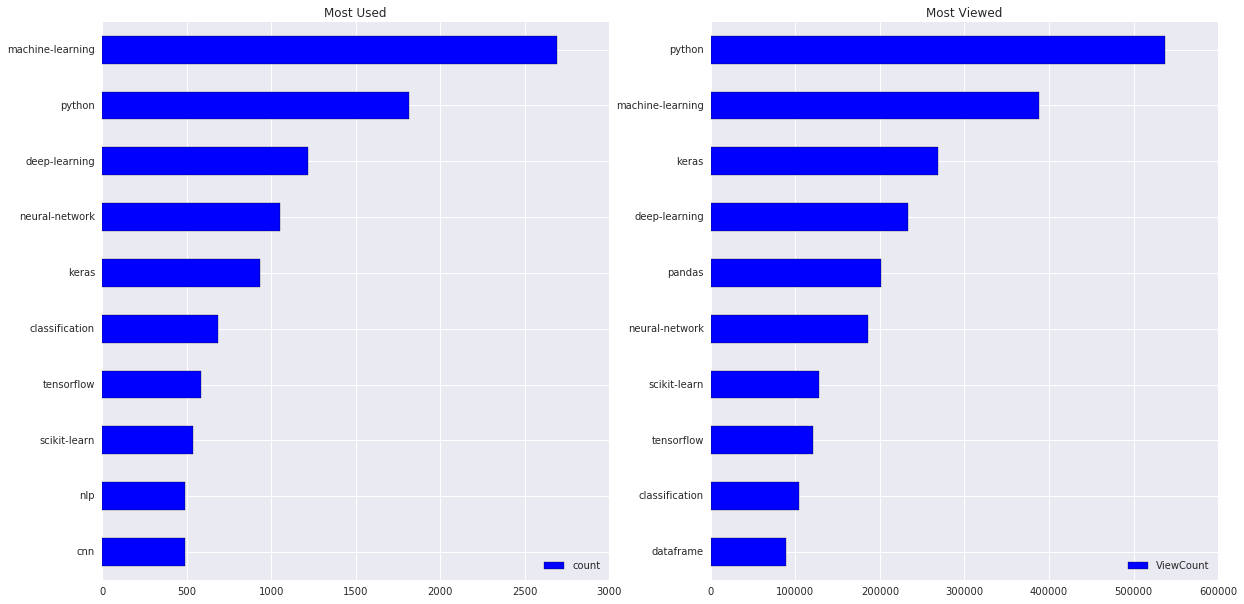

In [14]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
most_used.plot(kind="barh",ax=axes[0],color='blue',title='Most Used')
most_viewed.plot(kind="barh", ax=axes[1],color='blue',title='Most Viewed')

Check if tags are in both most_used and most_viewed or not

In [15]:
in_used=pd.merge(most_used,most_viewed,how='left',left_index=True,right_index=True)
in_used

,count,ViewCount
cnn,489,NaN
nlp,493,NaN
scikit-learn,540,128110.0
tensorflow,584,121369.0
classification,685,104457.0
keras,935,268608.0
neural-network,1055,185367.0
deep-learning,1220,233628.0
python,1814,537585.0
machine-learning,2693,388499.0


In [16]:
in_viewed=pd.merge(most_used,most_viewed,how='right',left_index=True,right_index=True)
in_viewed

,count,ViewCount
dataframe,NaN,89352
classification,685.0,104457
tensorflow,584.0,121369
scikit-learn,540.0,128110
neural-network,1055.0,185367
pandas,NaN,201787
deep-learning,1220.0,233628
keras,935.0,268608
machine-learning,2693.0,388499
python,1814.0,537585


From above, we can see some tags exist in most_viewed but does not exist in most_used and vice versa. Csv,Pytorch,numpy and data frame are not in Most Used. cnn and nip are not in Most Viewed. Other are shared in bothe dataframe. 

We cam see that python and marchin-learning have the been taged the most and there is not doublt that they have the most views. This makes sense, as a higher volume of tags to questions makes it more likely that a subject will be viewed.

# Relations Between Tags

We need to create a datafram showing tags as row indexs and tags as column 

In [17]:
#make a tag list 
all_tags=list(tag_count.index)
#use the tag list to create a df and fill in 0
associations=pd.DataFrame(index=all_tags,columns=all_tags)
associations.fillna(0,inplace=True)


We will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [18]:
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1
associations

,data-leakage,pruning,open-set,time-series,counts,azure-ml,siamese,bayesian-networks,image,multivariate-distribution,...,keras,object-recognition,apache-hadoop,genetic-algorithms,finite-precision,heatmap,epochs,semi-supervised-learning,huggingface,ensemble-modeling
data-leakage,8,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pruning,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
open-set,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
time-series,2,0,0,466,0,0,0,0,0,0,...,51,0,0,0,0,0,0,0,0,0
counts,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
azure-ml,0,0,0,0,0,12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
siamese,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bayesian-networks,0,0,0,0,0,0,0,12,0,0,...,1,0,0,0,0,0,0,0,0,0
image,0,0,0,0,0,0,0,0,32,0,...,3,0,0,0,0,0,0,0,0,0
multivariate-distribution,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [80]:
relations_most_used = associations.loc[most_used.index, most_used.index]
relations_most_used

,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
cnn,489,7,0,57,20,116,118,160,62,124
nlp,7,493,12,11,35,23,24,72,71,113
scikit-learn,0,12,540,15,47,34,24,16,235,188
tensorflow,57,11,15,584,20,256,108,136,167,106
classification,20,35,47,20,685,58,65,59,98,259
keras,116,23,34,256,58,935,235,247,280,195
neural-network,118,24,24,108,65,235,1055,305,137,366
deep-learning,160,72,16,136,59,247,305,1220,160,429
python,62,71,235,167,98,280,137,160,1814,499
machine-learning,124,113,188,106,259,195,366,429,499,2693


Let's create a heatmap to understand the realationship easily.

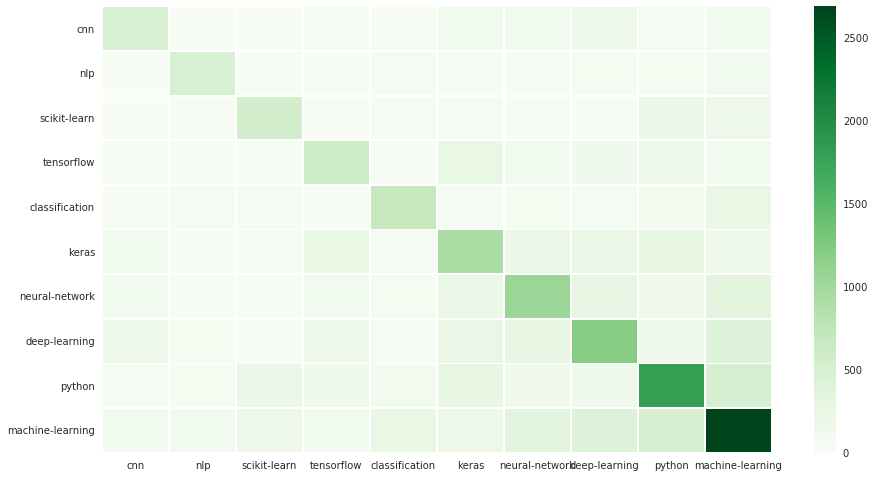

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(relations_most_used,cmap='Greens',linewidths=0.8,cbar=True)

# Result

Given by the dark concentration in the bottom right coner, the most used tag seems have the strong relationships.However, it does not calrify the they have strong realtion beacsue those tags just ended up being used togeter. Just like many people buy shampoon, many people buy toilet paper, so they end up being purchased together,but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.


We should do association rules to find out the relathion betwwen tags. We can also measure how strong this relations are on several fronts: how common the relation is, how strong it is, and how independent the components of the relationship areWe are not going to do further exploration in this case.

# Is deep learning just a fad?

In [20]:
question2=pd.read_csv('all_questions.csv',parse_dates=['CreationDate'])
question2['Tags']=question2['Tags'].str.replace('^<|>$','').str.split('><')

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

In [21]:
def deeplearning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
              return 1
        else:
              return 0
question2['Deeplearning']=question2['Tags'].apply(deeplearning)
question2.sample(15)

,Id,CreationDate,Tags,Deeplearning
18151,54293,2019-06-22 15:08:00,"[neural-network, deep-learning, keras, convnet...",1
3302,38546,2018-09-20 14:10:56,"[machine-learning, bigdata]",0
3687,56940,2019-08-04 21:34:46,[data],0
2208,56341,2019-07-24 21:34:12,"[machine-learning, xgboost, survival-analysis]",0
2376,15710,2016-12-13 06:32:17,[genetic-algorithms],0
5369,17168,2017-02-25 13:40:25,"[r, dataset, visualization, data, excel]",0
2092,37954,2018-09-08 05:22:03,"[neural-network, lstm, rnn, embeddings]",1
99,130,2014-05-18 06:26:15,"[feature-selection, feature-extraction, dimens...",0
2819,38277,2018-09-14 21:33:53,"[recommender-system, similarity, cosine-distan...",0
1854,786,2014-07-19 20:46:52,"[data-mining, dataset]",0


The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since we don't have all the data for the first quarter of 2020, we'll get rid of those dates:

In [22]:
question2=question2.loc[question2['CreationDate'].dt.year<2020,:]

In [71]:
#Create a column to show quarter
def qua(datetime):
    year=str(datetime.year)[-2:]
    quarter=str(((datetime.month-1)//3)+1)
    return '{y}Q{q}'.format(y=year,q=quarter)

question2['Quarter']=question2['CreationDate'].apply(qua)
question2

,Id,CreationDate,Tags,Deeplearning,quarter,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",0,19Q1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1,19Q1
5,45428,2019-02-12 05:43:18,[cnn],1,19Q1,19Q1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0,19Q1,19Q1
7,45431,2019-02-12 07:26:56,[machine-learning],0,19Q1,19Q1
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",0,19Q1,19Q1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1,19Q1,19Q1


Then we can groupby quarter to count:

a,Count the number of deep learning questions.

b.Count the total number of questions.

c,Compute the ratio between the two numbers above. 

In [74]:
quarterly=question2.groupby('Quarter').agg({'Deeplearning':['sum','size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] =round( quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"],2)
quarterly.reset_index(inplace=True)
quarterly

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
0,14Q2,3,157,0.02
1,14Q3,4,189,0.02
2,14Q4,4,216,0.02
3,15Q1,5,190,0.03
4,15Q2,6,284,0.02
5,15Q3,13,311,0.04
6,15Q4,19,382,0.05
7,16Q1,38,516,0.07
8,16Q2,45,518,0.09
9,16Q3,69,585,0.12


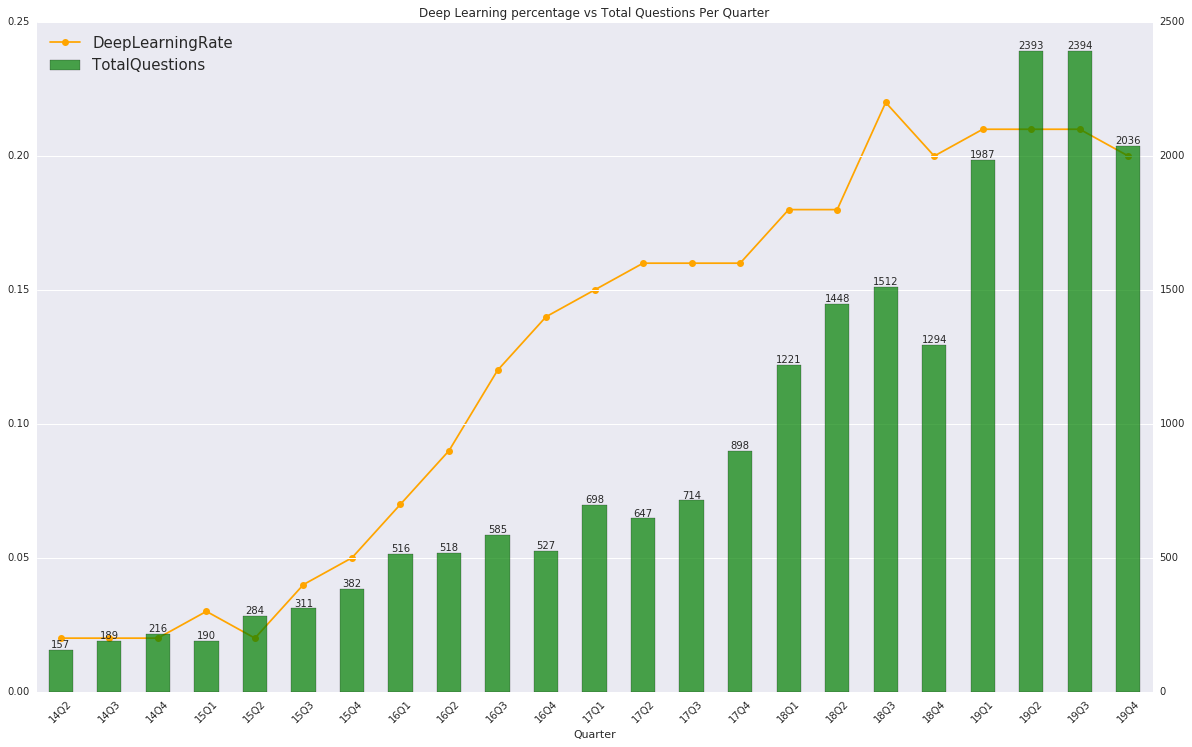

In [73]:
ax1=quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(20,12)
                    )

ax2=quarterly.plot(x="Quarter", y="TotalQuestions",color='green',
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)
ax1.get_legend().remove()
#set up legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 15})
#annotation
for idx, t in quarterly["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
#set title
plt.title("Deep Learning percentage vs Total Questions Per Quarter")


# Result 

From the above chart, we can see that the percentages of questions has a significant increase from 2015 quarter 2 to 2015 quarter 3,from 20% to 40%. Since 2015Q2,the popularity of deep learning continuted to increase till 2018 quarter 4. After 2019 quarter 1, the percentage of questions stability decreased. However, it still passed the rate in 2018 quarter 2 which is the lowest rate in 2018 and 2019. 

Based on this trend,I believe popularity of deeplearning will keep growing but it will grow slowly. 